In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

x_train = np.load('./StockData/TrainingData/NormtrainingX_stock0050.npy')
y_train = np.load('./StockData/TrainingData/trainingY_stock0050.npy')
x_test = np.load('./StockData/TrainingData/NormtestingX_stock0050.npy')
y_test = np.load('./StockData/TrainingData/testingY_stock0050.npy')

x_train = np.where(np.isnan(x_train), 0, x_train)
x_test = np.where(np.isnan(x_test), 0, x_test)
y_train = np.where(np.isnan(y_train), 0, y_train)
x_train =x_train.reshape(-1,5,x_train.shape[1])
x_test =x_test.reshape(-1,5,x_train.shape[1])
#x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.25,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
#print(x_train[1])
#print(y_train)

model = Sequential()
print(x_train.shape[2])
model.add(LSTM(50,input_shape=(5,x_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences =False))
#model.add(Dropout(0.2))
#model.add(LSTM(10))
#model.add(Dropout(0.2))
model.add(Dense(1))

sgd = optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mse",optimizer=sgd)

model.summary()

callback = EarlyStopping(monitor="loss", patience=50, verbose=1, mode="auto")
tbCallBack = TensorBoard(log_dir='./logs',  # log 目录
                 histogram_freq=0,  # 按照何等频率（epoch）来计算直方图，0为不计算
#                  batch_size=32,     # 用多大量的数据计算直方图
                 write_graph=True,  # 是否存储网络结构图
                 write_grads=True, # 是否可视化梯度直方图
                 write_images=True,# 是否可视化参数
                 embeddings_freq=0, 
                 embeddings_layer_names=None, 
                 embeddings_metadata=None)
model.fit(x_train,y_train, epochs=1000, batch_size=20, callbacks=[callback,tbCallBack],validation_data=(x_train,y_train),validation_split=0.2)


(503, 5, 5)
(168, 5, 5)
(503,)
5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 5, 50)             11200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 51,651
Trainable params: 51,651
Non-trainable params: 0
_______________________________________

503/503 [==============================] - 0s 539us/step - loss: 0.0113 - val_loss: 0.0071
Epoch 68/1000
503/503 [==============================] - 0s 459us/step - loss: 0.0112 - val_loss: 0.0083
Epoch 69/1000
503/503 [==============================] - 0s 466us/step - loss: 0.0117 - val_loss: 0.0074
Epoch 70/1000
503/503 [==============================] - 0s 444us/step - loss: 0.0113 - val_loss: 0.0084
Epoch 71/1000
503/503 [==============================] - 0s 462us/step - loss: 0.0137 - val_loss: 0.0068
Epoch 72/1000
503/503 [==============================] - 0s 437us/step - loss: 0.0131 - val_loss: 0.0065
Epoch 73/1000
503/503 [==============================] - 0s 433us/step - loss: 0.0119 - val_loss: 0.0117
Epoch 74/1000
503/503 [==============================] - 0s 523us/step - loss: 0.0118 - val_loss: 0.0064
Epoch 75/1000
503/503 [==============================] - 0s 469us/step - loss: 0.0118 - val_loss: 0.0080
Epoch 76/1000
503/503 [==============================] - 0s 462us/ste

503/503 [==============================] - 0s 419us/step - loss: 0.0062 - val_loss: 0.0038
Epoch 145/1000
503/503 [==============================] - 0s 483us/step - loss: 0.0063 - val_loss: 0.0052
Epoch 146/1000
503/503 [==============================] - 0s 431us/step - loss: 0.0070 - val_loss: 0.0045
Epoch 147/1000
503/503 [==============================] - 0s 499us/step - loss: 0.0059 - val_loss: 0.0047
Epoch 148/1000
503/503 [==============================] - 0s 446us/step - loss: 0.0064 - val_loss: 0.0037
Epoch 149/1000
503/503 [==============================] - 0s 462us/step - loss: 0.0067 - val_loss: 0.0033
Epoch 150/1000
503/503 [==============================] - 0s 451us/step - loss: 0.0069 - val_loss: 0.0039
Epoch 151/1000
503/503 [==============================] - 0s 428us/step - loss: 0.0058 - val_loss: 0.0034
Epoch 152/1000
503/503 [==============================] - 0s 479us/step - loss: 0.0068 - val_loss: 0.0031
Epoch 153/1000
503/503 [==============================] - 0s 

503/503 [==============================] - 0s 427us/step - loss: 0.0048 - val_loss: 0.0016
Epoch 222/1000
503/503 [==============================] - 0s 534us/step - loss: 0.0039 - val_loss: 0.0024
Epoch 223/1000
503/503 [==============================] - 0s 475us/step - loss: 0.0043 - val_loss: 0.0016
Epoch 224/1000
503/503 [==============================] - 0s 440us/step - loss: 0.0040 - val_loss: 0.0016
Epoch 225/1000
503/503 [==============================] - 0s 421us/step - loss: 0.0038 - val_loss: 0.0026
Epoch 226/1000
503/503 [==============================] - 0s 466us/step - loss: 0.0048 - val_loss: 0.0026
Epoch 227/1000
503/503 [==============================] - 0s 458us/step - loss: 0.0057 - val_loss: 0.0021
Epoch 228/1000
503/503 [==============================] - 0s 416us/step - loss: 0.0047 - val_loss: 0.0020
Epoch 229/1000
503/503 [==============================] - 0s 522us/step - loss: 0.0045 - val_loss: 0.0017
Epoch 230/1000
503/503 [==============================] - 0s 

503/503 [==============================] - 0s 440us/step - loss: 0.0036 - val_loss: 0.0013
Epoch 299/1000
503/503 [==============================] - 0s 440us/step - loss: 0.0037 - val_loss: 0.0017
Epoch 300/1000
503/503 [==============================] - 0s 442us/step - loss: 0.0045 - val_loss: 0.0015
Epoch 301/1000
503/503 [==============================] - 0s 450us/step - loss: 0.0033 - val_loss: 7.8620e-04
Epoch 302/1000
503/503 [==============================] - 0s 425us/step - loss: 0.0039 - val_loss: 0.0013
Epoch 303/1000
503/503 [==============================] - 0s 545us/step - loss: 0.0036 - val_loss: 0.0013
Epoch 304/1000
503/503 [==============================] - 0s 453us/step - loss: 0.0038 - val_loss: 0.0031
Epoch 305/1000
503/503 [==============================] - 0s 447us/step - loss: 0.0040 - val_loss: 0.0013
Epoch 306/1000
503/503 [==============================] - 0s 438us/step - loss: 0.0034 - val_loss: 0.0019
Epoch 307/1000
503/503 [==============================] -

503/503 [==============================] - 0s 441us/step - loss: 0.0031 - val_loss: 0.0011
Epoch 375/1000
503/503 [==============================] - 0s 487us/step - loss: 0.0026 - val_loss: 7.6782e-04
Epoch 376/1000
503/503 [==============================] - 0s 436us/step - loss: 0.0028 - val_loss: 0.0012
Epoch 377/1000
503/503 [==============================] - 0s 465us/step - loss: 0.0028 - val_loss: 0.0011
Epoch 378/1000
503/503 [==============================] - 0s 498us/step - loss: 0.0028 - val_loss: 0.0011
Epoch 379/1000
503/503 [==============================] - 0s 476us/step - loss: 0.0028 - val_loss: 7.9972e-04
Epoch 380/1000
503/503 [==============================] - 0s 421us/step - loss: 0.0027 - val_loss: 7.9160e-04
Epoch 381/1000
503/503 [==============================] - 0s 431us/step - loss: 0.0026 - val_loss: 9.0407e-04
Epoch 382/1000
503/503 [==============================] - 0s 461us/step - loss: 0.0032 - val_loss: 7.7698e-04
Epoch 383/1000
503/503 [=================

In [7]:
model.predict(x_test)

array([[-0.7179551 ],
       [ 1.099312  ],
       [-1.0142136 ],
       [ 0.9181247 ],
       [ 0.5312067 ],
       [-0.0307488 ],
       [-0.3510592 ],
       [-0.976289  ],
       [-0.47498354],
       [-0.3283837 ],
       [-0.30154577],
       [ 0.467236  ],
       [-0.10460417],
       [ 0.6645407 ],
       [ 0.06514611],
       [-0.7751114 ],
       [ 1.0632688 ],
       [ 0.48341963],
       [ 0.55359787],
       [ 0.7660967 ],
       [-0.64563376],
       [ 0.0722546 ],
       [-1.055348  ],
       [ 0.7613002 ],
       [ 0.25160095],
       [-0.01555797],
       [ 0.81617516],
       [ 0.04670236],
       [ 0.7792099 ],
       [ 0.9642442 ],
       [-0.46426526],
       [-0.4646953 ],
       [ 1.0147951 ],
       [ 0.0831859 ],
       [ 0.45527178],
       [-0.83006674],
       [ 0.790616  ],
       [ 0.4475919 ],
       [-0.96181256],
       [ 0.4618664 ],
       [-0.40945387],
       [ 0.80713147],
       [-0.9806984 ],
       [ 0.86884487],
       [ 0.94613814],
       [ 0

In [ ]:
print(y_test)

In [ ]:
x_train.shape

In [ ]:
x_test.shape

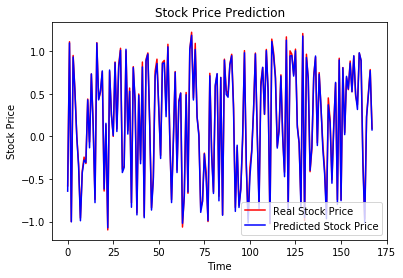

In [4]:
predicted_stock_price = model.predict(x_test)
# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()